In [ ]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
 
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.drop('diseases', axis=1).values
    y = df['diseases'].values
    
    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_categorical = to_categorical(y_encoded)
    
    return X, y_categorical, le

X, y, label_encoder = load_data('data/Final_Augmented_dataset_Diseases_and_Symptoms.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
input_shape = (1, X_train.shape[2])

In [ ]:
 
model = Sequential([
    LSTM(128, input_shape=input_shape, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       259,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 773)            │        50,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,725 (1.37 MB)

 Trainable params: 358,725 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.3099 - loss: 3.6187 - val_accuracy: 0.7774 - val_loss: 0.8683
Epoch 2/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.7663 - loss: 0.9005 - val_accuracy: 0.8280 - val_loss: 0.5536
Epoch 3/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8115 - loss: 0.6461 - val_accuracy: 0.8449 - val_loss: 0.4675
Epoch 4/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.8286 - loss: 0.5563 - val_accuracy: 0.8457 - val_loss: 0.4351
Epoch 5/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.8376 - loss: 0.5113 - val_accuracy: 0.8508 - val_loss: 0.4189
Epoch 6/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.8427 - loss: 0.4843 - val_accuracy: 0.8531 - val_loss: 0.4015
Epoch 7/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8457 - loss: 0.4683 - val_accuracy: 0.8495 - val_loss: 0.4016
Epoch 8/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.8490 - loss:

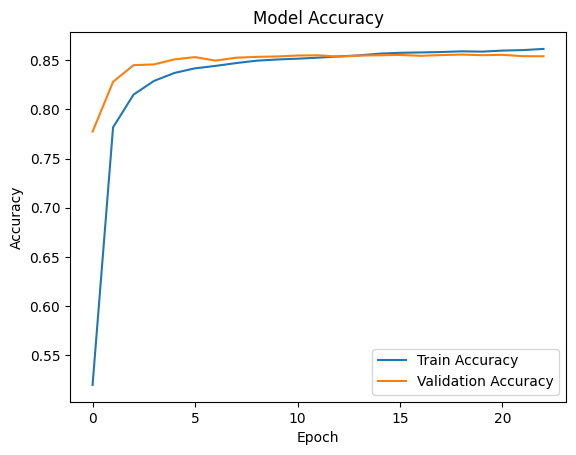

1544/1544 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8607 - loss: 0.3686
Test Accuracy: 0.8569

Classification Report (Present Classes Only):


c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.95      1.00      0.98        20
                                        abdominal hernia       0.95      0.96      0.96        81
                                         abscess of nose       0.88      0.86      0.87        58
                                     abscess of the lung       1.00      0.83      0.91         6
                                  abscess of the pharynx       0.95      0.92      0.94        63
                                    acanthosis nigricans       0.86      1.00      0.92         6
                                               acariasis       1.00      0.80      0.89         5
                                               achalasia       0.62      0.90      0.73        20
                                                    acne       0.82      0.68      0.74       103
                   

c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mehta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
 
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

present_labels = np.unique(np.concatenate([y_true_classes, y_pred_classes]))
present_target_names = label_encoder.inverse_transform(present_labels)

print("\nClassification Report (Present Classes Only):")
print(classification_report(y_true_classes, y_pred_classes, 
                         labels=present_labels,
                         target_names=present_target_names))